In [1]:
from potential_initialization import *
from shuttling import *
%load_ext autoreload
%autoreload 2

In [2]:
pbi, ppi = dict(), dict()

In [3]:

shuttle_range = [[-1, 1], [-0.1, 0.1], [0.05, 0.1]]
junction = trap_model("junction", shuttle_range, pbi, ppi)

100%|██████████| 400/400 [00:01<00:00, 333.19it/s]


100%|██████████| 50/50 [00:56<00:00,  1.12s/it]


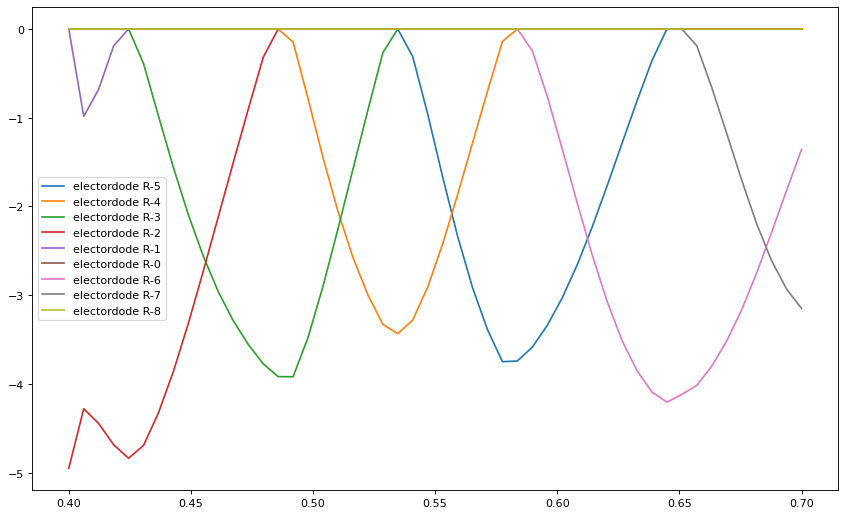

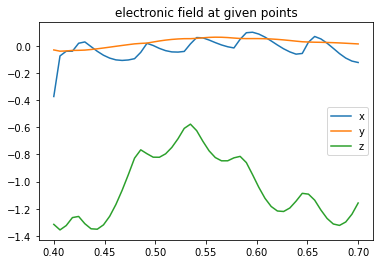

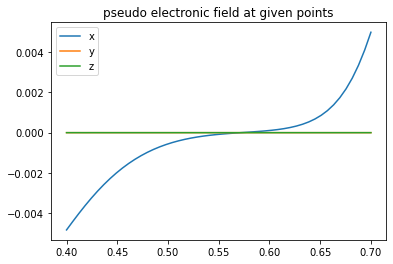

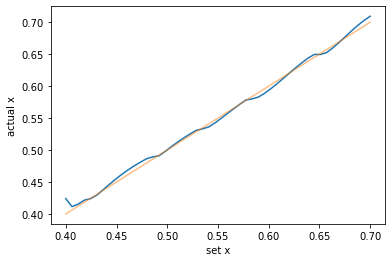

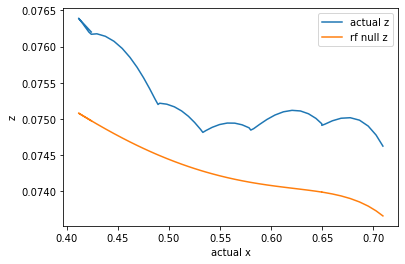

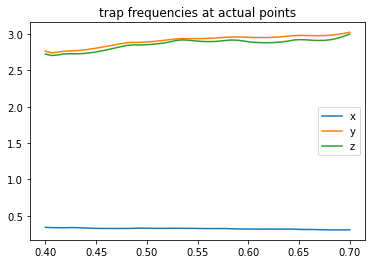

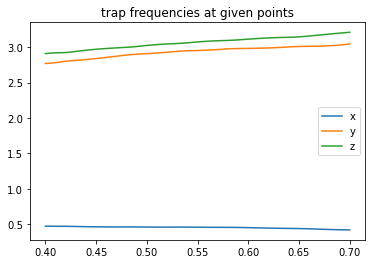

In [4]:
%matplotlib inline
profile = np.linspace(0.4, 0.7, 50)
voltages, grads, frequencies, psEs, positions \
    = junction.optimized_voltage_profile(profile, top_nearest=5, alpha=200, w=[0, 1000, 0, 100, 100, 1, 1, 0.5, 0.5, 0],\
                                              omega=[0.5, 3, 3], confine_voltage=0, max_voltage=10, calc_position=True, compensate_z=False)

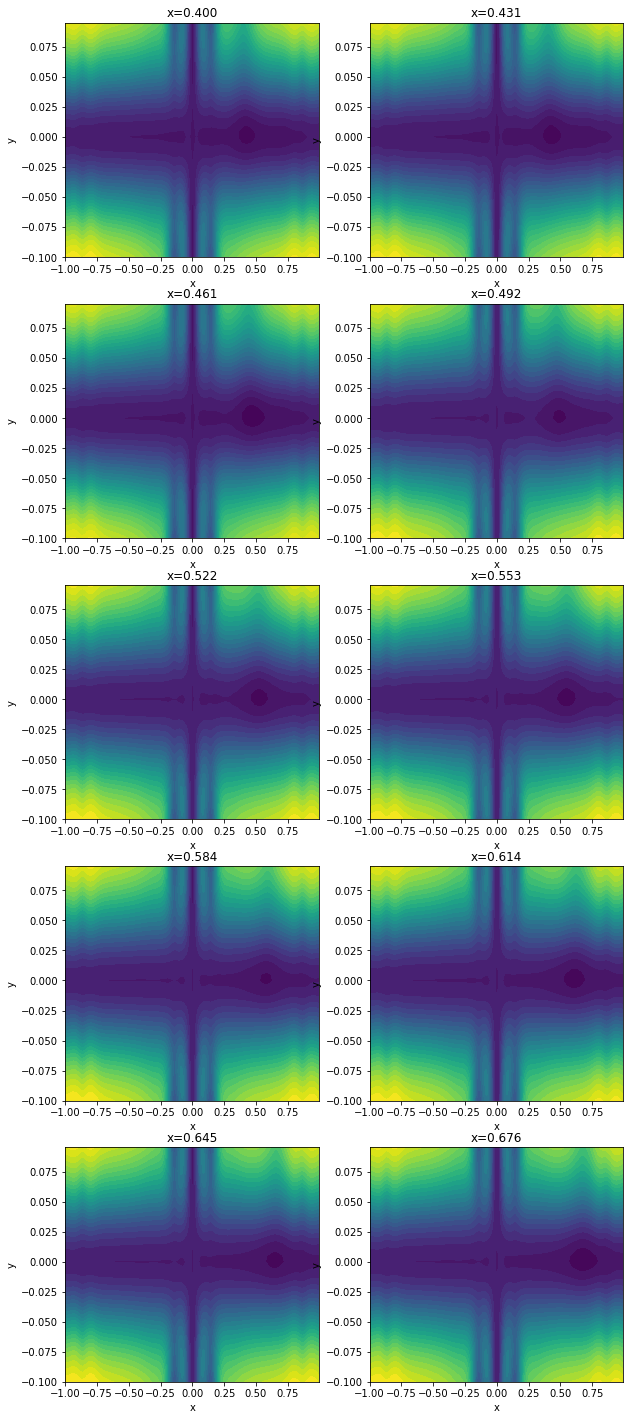

In [5]:

fig, ax = plt.subplots(5, 2, figsize=(10, 25))
cnt = 0
ax = ax.reshape(ax.size)
for i, opt in enumerate(voltages):
    if i % 5 == 0:
        junction.plot_slice(opt, z=positions[i, 2], ax=ax[cnt])
        ax[cnt].set_title('x=%.3f' % profile[i])
        # ax[cnt].set_xlabel("x")
        cnt += 1

## 下一步工作
1. 设计大家都能调的接口
   1. 确定能被调用的电极
   2. 确定不能够调用的电极，并指定它们的电压，如果没有指定，则设为0
   3. 运动过程中用的电极是否变化
2. 如果1做不到，那就尝试自己调
3. 把surface小三角形变稀疏，根据pseudo potential的长相确定场点范围